In [196]:
# Importer les modules nécessaires
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [198]:
hmeq=pd.read_csv("hmeq.csv",sep=",")

In [177]:
hmeq.head(10)


,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


In [202]:
hmeq.describe(include="all")

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,3364.000000,3364.000000,3364.000000,3364.000000,3364,3364,3364.000000,3364.000000,3364.000000,3364.000000,3364.000000,3364.00000,3364.000000
unique,NaN,NaN,NaN,NaN,2,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,DebtCon,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,2369,1286,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.089180,19154.399524,76249.621581,107501.385850,NaN,NaN,9.110285,0.146849,0.278835,180.993684,1.037455,22.11415,34.135451
std,0.285045,10875.418447,45095.372690,54728.240086,NaN,NaN,7.596541,0.579524,0.809631,82.769271,1.549777,9.38733,7.951413
min,0.000000,1700.000000,5076.000000,21144.000000,NaN,NaN,0.000000,0.000000,0.000000,0.486711,0.000000,0.00000,0.838118
25%,0.000000,12000.000000,49351.250000,71235.000000,NaN,NaN,3.000000,0.000000,0.000000,118.687903,0.000000,16.00000,29.362596
50%,0.000000,17000.000000,67278.500000,94453.500000,NaN,NaN,7.000000,0.000000,0.000000,176.742048,1.000000,21.00000,35.129484
75%,0.000000,23825.000000,92986.750000,122339.250000,NaN,NaN,13.000000,0.000000,0.000000,230.402191,2.000000,27.00000,39.087624


In [203]:
hmeq.isnull().sum()


BAD        0
LOAN       0
MORTDUE    0
VALUE      0
REASON     0
JOB        0
YOJ        0
DEROG      0
DELINQ     0
CLAGE      0
NINQ       0
CLNO       0
DEBTINC    0
dtype: int64

In [204]:
# Créer une nouvelle version de la base de données sans la variable "BAD"
hmeq_new = hmeq.drop(columns=['BAD'])
hmeq_new.head()

,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
5,1700,30548.0,40320.0,HomeImp,Other,9.0,0.0,0.0,101.466002,1.0,8.0,37.113614
7,1800,28502.0,43034.0,HomeImp,Other,11.0,0.0,0.0,88.766030,0.0,8.0,36.884894
19,2300,102370.0,120953.0,HomeImp,Office,2.0,0.0,0.0,90.992533,0.0,13.0,31.588503
25,2400,34863.0,47471.0,HomeImp,Mgr,12.0,0.0,0.0,70.491080,1.0,21.0,38.263601
26,2400,98449.0,117195.0,HomeImp,Office,4.0,0.0,0.0,93.811775,0.0,13.0,29.681827


Definition of Variables 

- Loan: Total of Amount of loan
-Mortdue:
- Value:
-Reason: Give the reason a person wants to take a loan. There several options such as Home Improvement
-Job: Different types of 

In [199]:
hmeq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


In [200]:
hmeq = hmeq.dropna()

In [180]:
hmeq.info()
# Afficher les noms de colonnes mis à jour
print(hmeq.columns)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3364 entries, 5 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      3364 non-null   int64  
 1   LOAN     3364 non-null   int64  
 2   MORTDUE  3364 non-null   float64
 3   VALUE    3364 non-null   float64
 4   REASON   3364 non-null   object 
 5   JOB      3364 non-null   object 
 6   YOJ      3364 non-null   float64
 7   DEROG    3364 non-null   float64
 8   DELINQ   3364 non-null   float64
 9   CLAGE    3364 non-null   float64
 10  NINQ     3364 non-null   float64
 11  CLNO     3364 non-null   float64
 12  DEBTINC  3364 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 367.9+ KB
Index(['BAD', 'LOAN', 'MORTDUE', 'VALUE', 'REASON', 'JOB', 'YOJ', 'DEROG',
       'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC'],
      dtype='object')


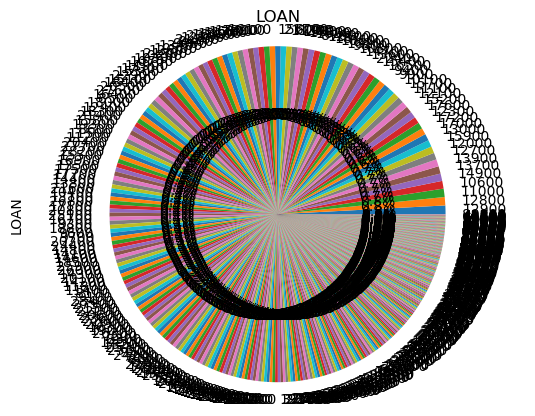

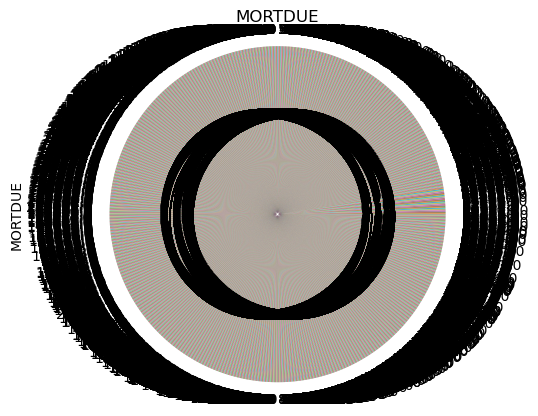

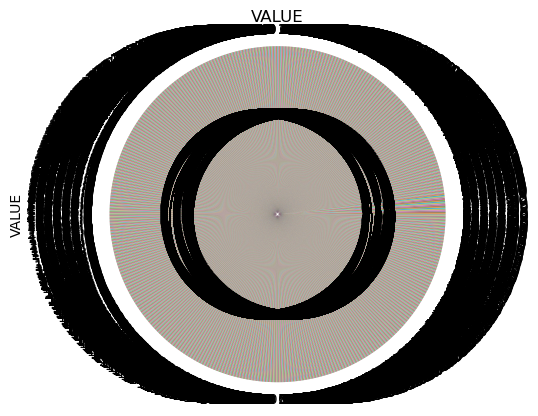

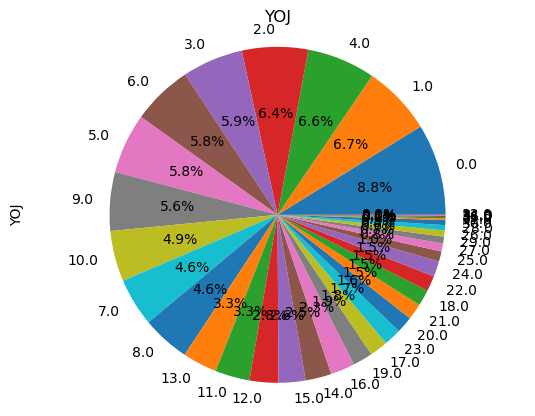

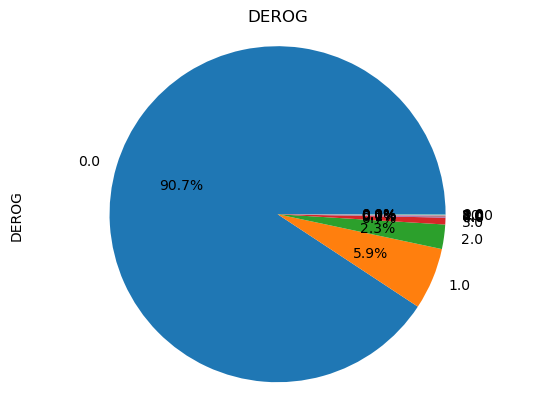

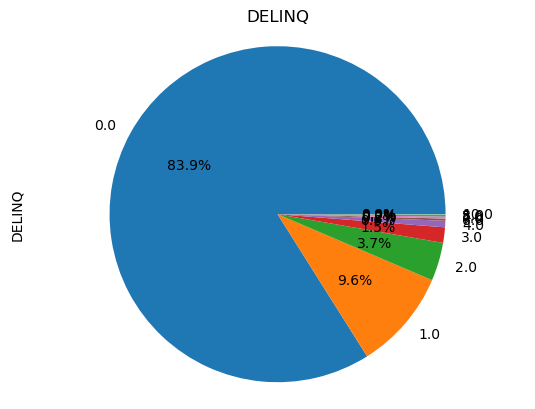

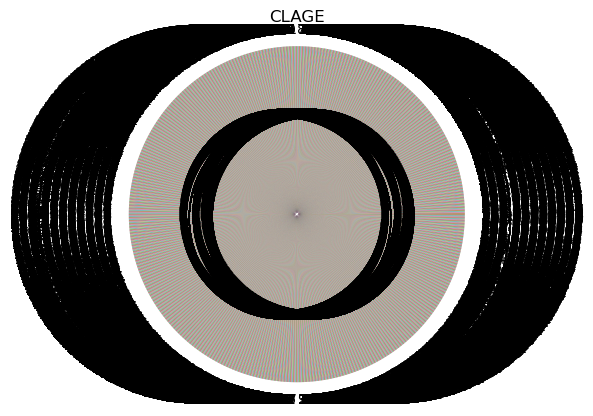

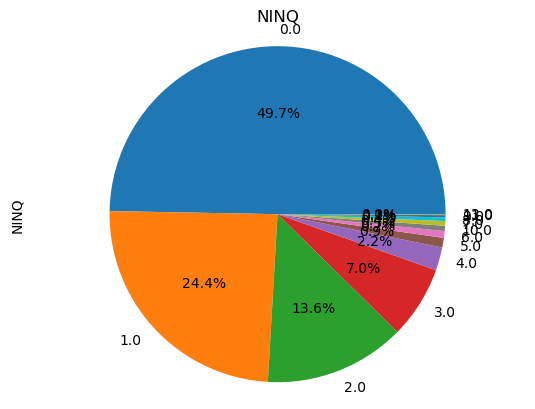

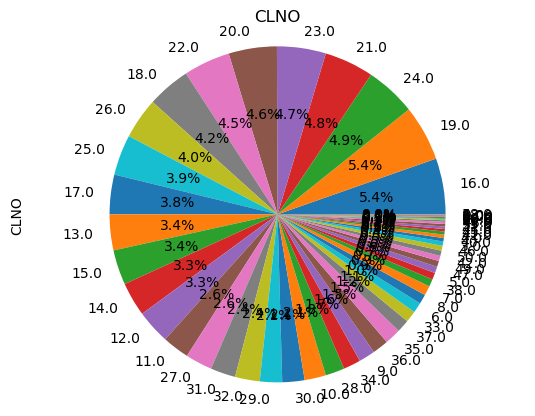

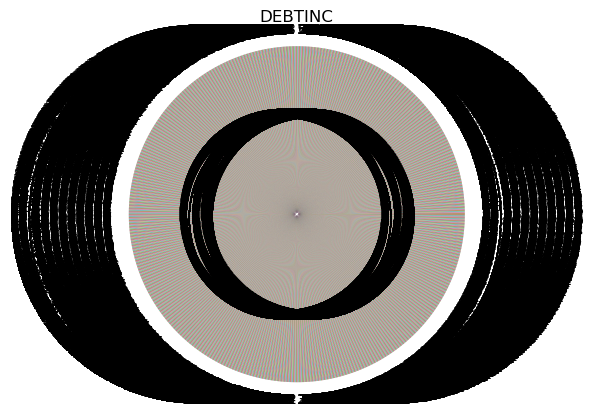

In [226]:
# Sélectionner les variables catégorielles
cat_vars = ['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO','DEBTINC']
# Générer un pie plot pour chaque variable catégorielle
for var in cat_vars:
    hmeq[var].value_counts().plot(kind='pie', autopct='%1.1f%%')
    plt.title(var)
    plt.axis('equal')
    plt.show()

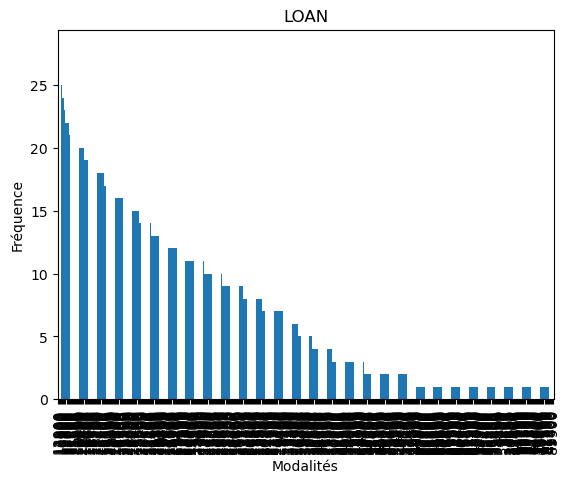

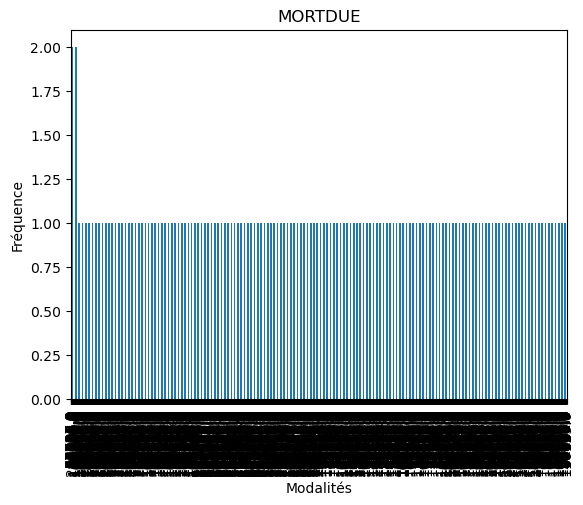

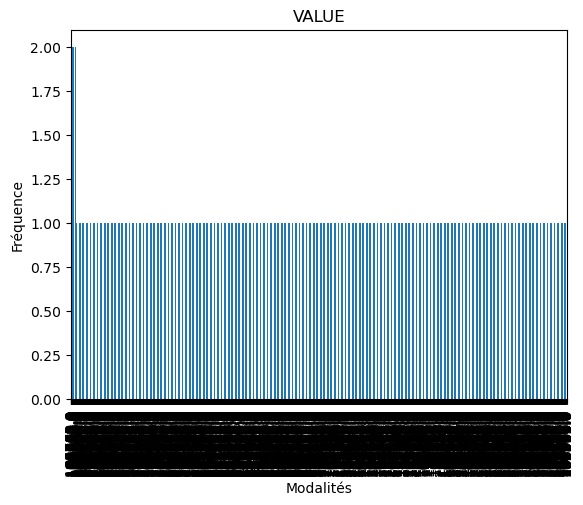

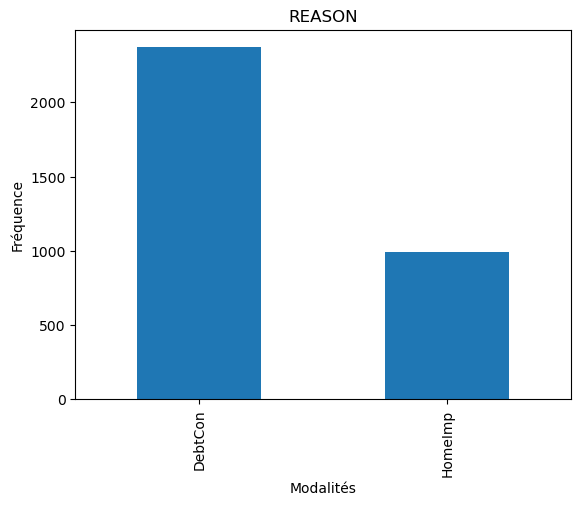

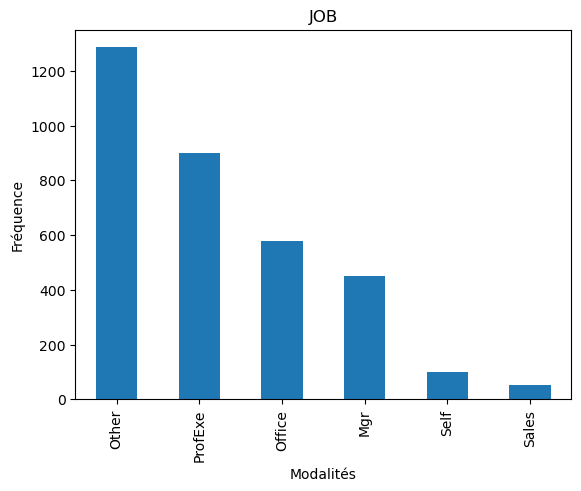

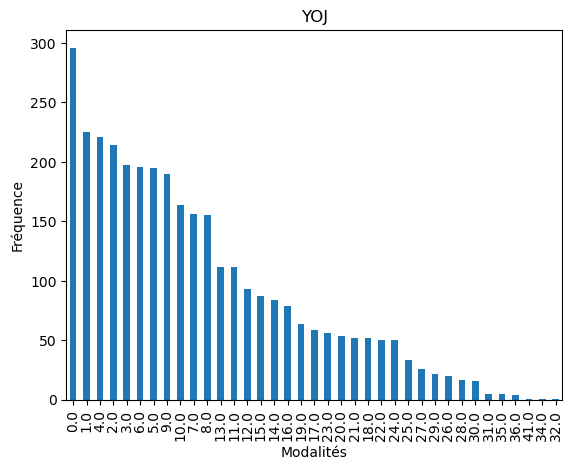

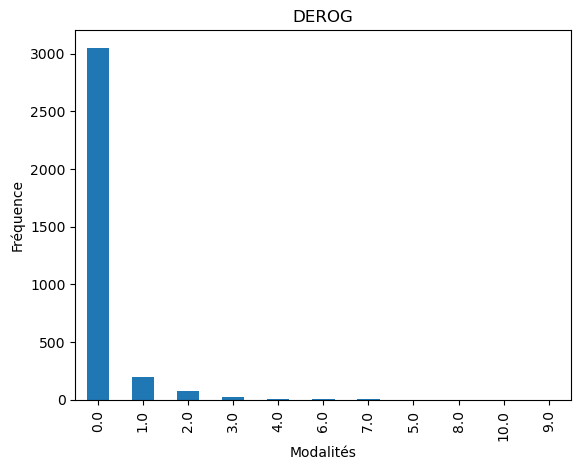

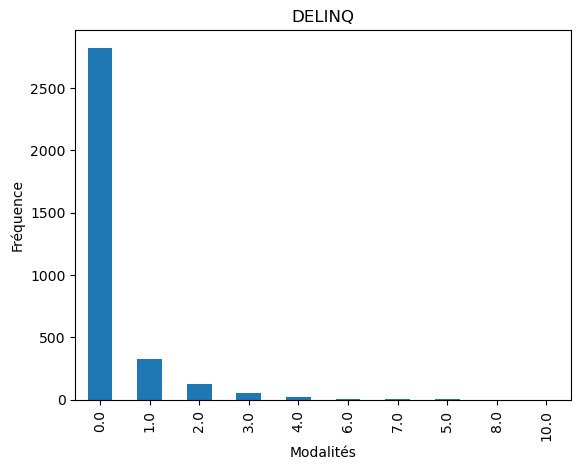

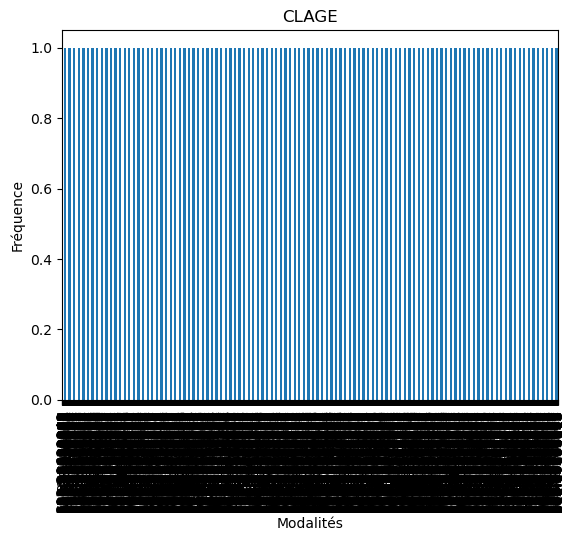

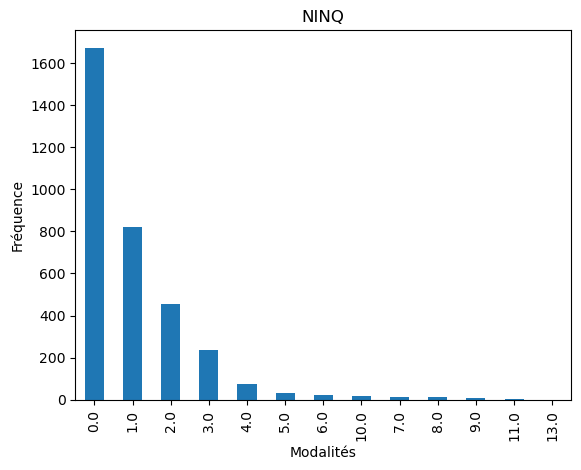

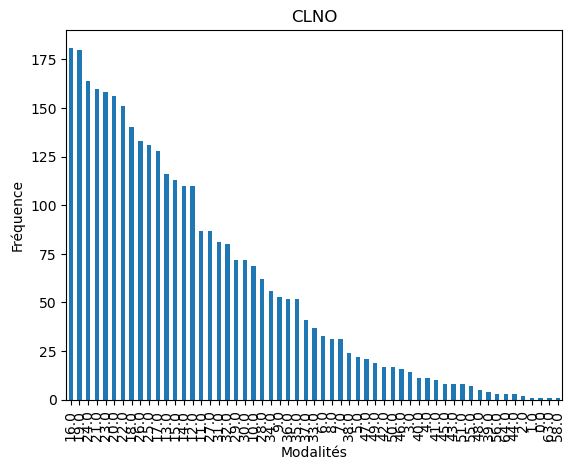

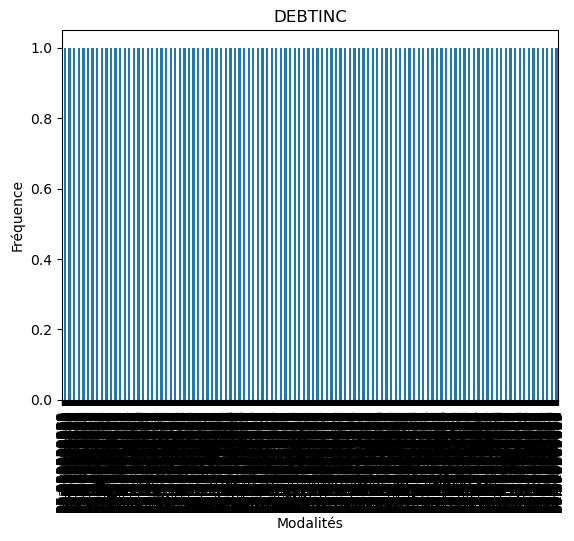

In [224]:
# Générer un bar plot pour chaque variable catégorielle
for var in cat_vars:
    hmeq[var].value_counts().plot(kind='bar')
    plt.title(var)
    plt.xlabel('Modalités')
    plt.ylabel('Fréquence')
    plt.show()

In [227]:
hmeq.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3364 entries, 5 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      3364 non-null   int64  
 1   LOAN     3364 non-null   int64  
 2   MORTDUE  3364 non-null   float64
 3   VALUE    3364 non-null   float64
 4   REASON   3364 non-null   object 
 5   JOB      3364 non-null   object 
 6   YOJ      3364 non-null   float64
 7   DEROG    3364 non-null   float64
 8   DELINQ   3364 non-null   float64
 9   CLAGE    3364 non-null   float64
 10  NINQ     3364 non-null   float64
 11  CLNO     3364 non-null   float64
 12  DEBTINC  3364 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 367.9+ KB


In [228]:
# Sélectionner les variables numériques
num_vars = ['LOAN', 'MORTDUE', 'VALUE', 'REASON', 'JOB', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO','DEBTINC']

# Générer un box plot pour chaque variable numérique
for var in num_vars:
    bankdata[var].plot(kind='box')
    plt.title(var)
    plt.show()

NameError: name 'bankdata' is not defined

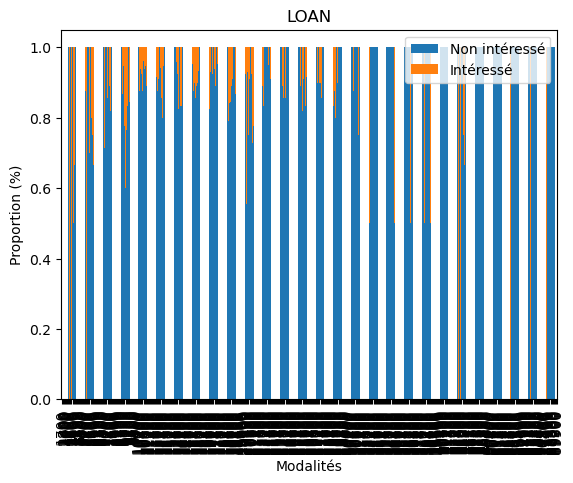

C:\Users\Achille\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


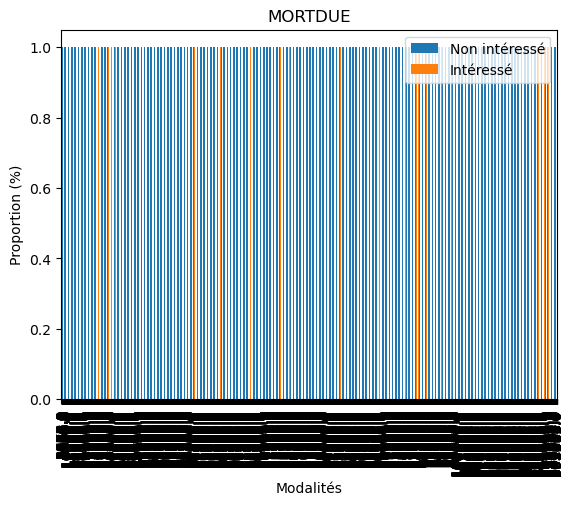

C:\Users\Achille\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


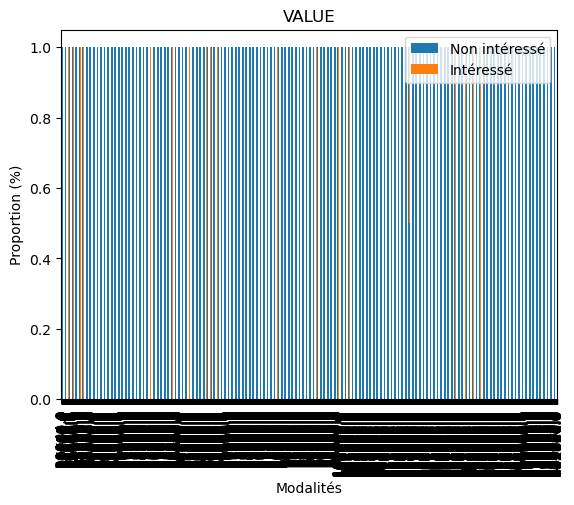

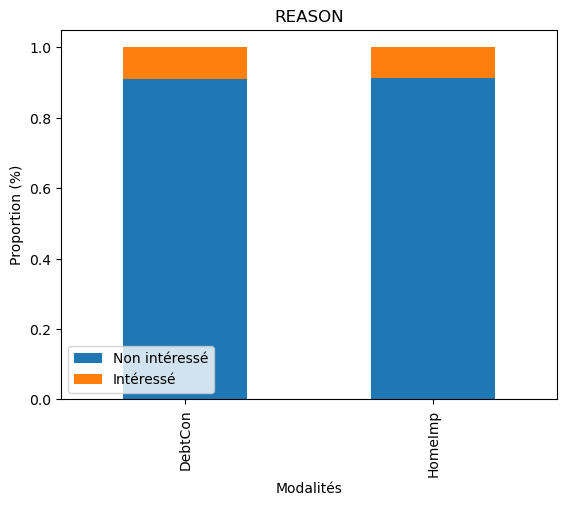

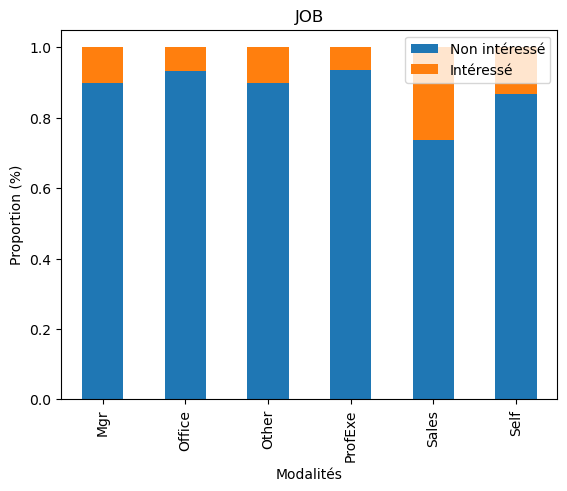

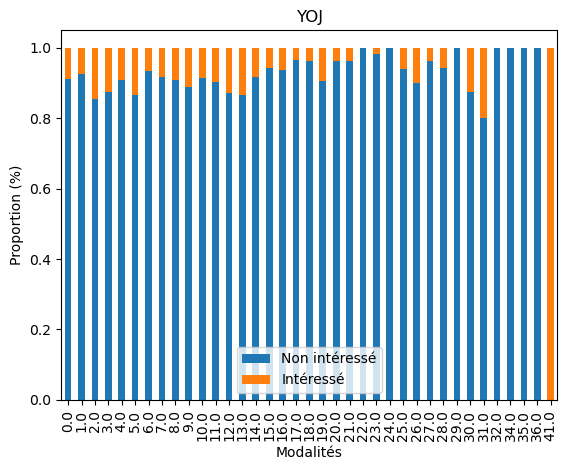

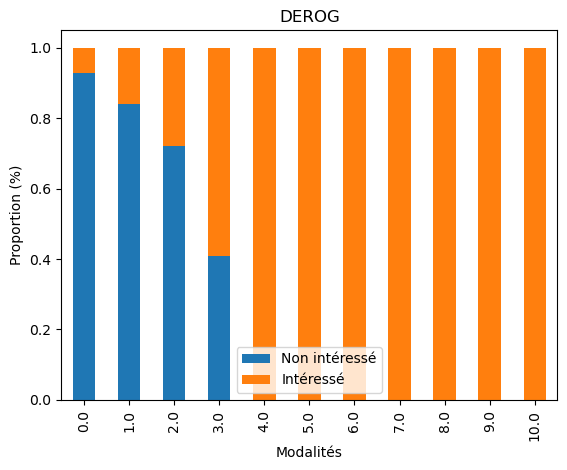

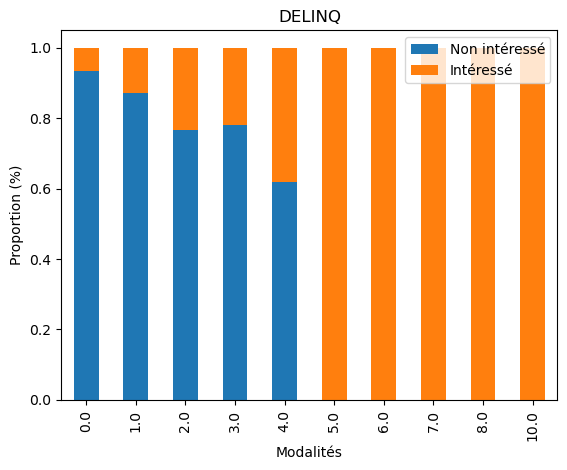

C:\Users\Achille\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


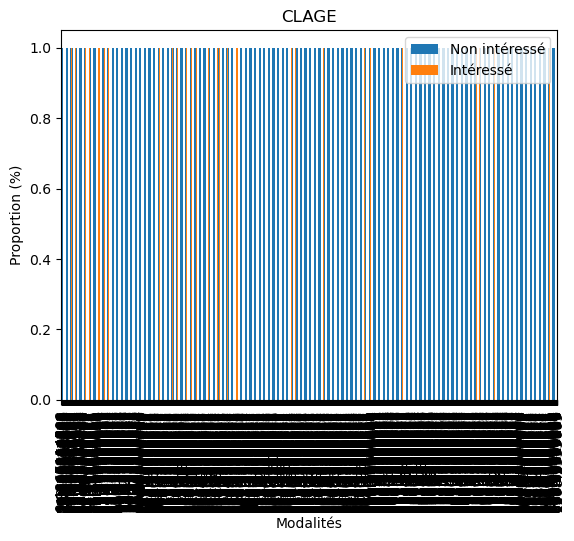

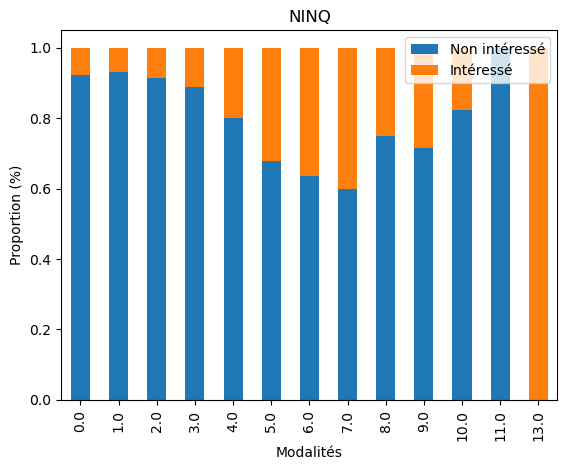

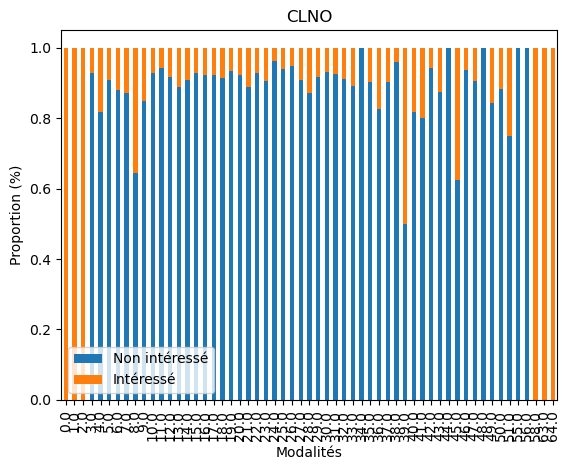

C:\Users\Achille\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


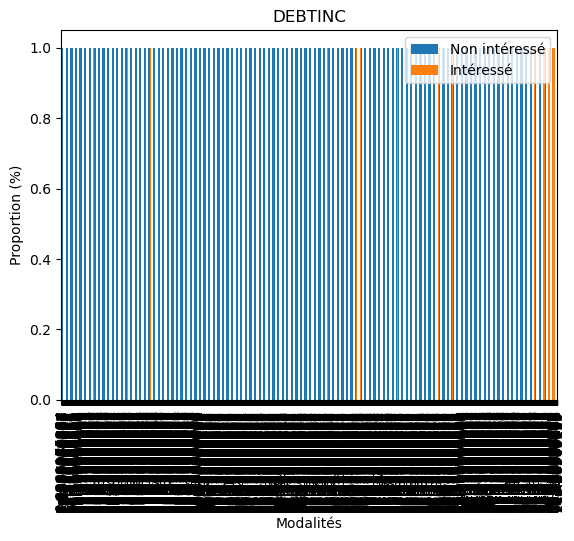

In [230]:
import seaborn as sns
# Sélectionner les variables catégorielles
# Sélectionner les variables catégorielles
cat_vars = ['LOAN', 'MORTDUE', 'VALUE', 'REASON', 'JOB', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO','DEBTINC']


# Générer un count plot pour chaque variable catégorielle
# Définir la taille des figures




# Générer un bar plot pour chaque variable catégorielle
for var in cat_vars:
    figsize = (20, 20)
    (hmeq.groupby([var, 'BAD'])['BAD'].count()/hmeq.groupby([var])[var].count()).unstack(level=1).plot(kind='bar', stacked=True)
    plt.title(var)
    plt.xlabel('Modalités')
    plt.ylabel('Proportion (%)')
    plt.legend(['Non intéressé', 'Intéressé'])
    plt.show()

In [231]:
import statsmodels.api as sm
# Sélectionner les variables explicatives et la variable d'intérêt
X = hmeq[['LOAN', 'MORTDUE', 'VALUE', 'REASON', 'JOB', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO','DEBTINC']]
y = hmeq['BAD']

In [232]:
X = pd.get_dummies(X, columns=['REASON', 'JOB'], drop_first=True)

In [233]:
# Ajouter une constante pour l'interception
X = sm.add_constant(X)

In [234]:
# Diviser les données en ensembles d'apprentissage et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [235]:
y_train.info()

<class 'pandas.core.series.Series'>
Int64Index: 2691 entries, 2499 to 5572
Series name: BAD
Non-Null Count  Dtype
--------------  -----
2691 non-null   int64
dtypes: int64(1)
memory usage: 42.0 KB


In [236]:
y_train.unique()

array([0, 1], dtype=int64)

In [237]:
 # Créer le modèle de régression logistique
logit_model = sm.Logit(y_train, X_train)

In [238]:
# Ajuster le modèle aux données d'apprentissage
result = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.236122
         Iterations 7


In [218]:
# Afficher le résumé des résultats de la régression
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:                    BAD   No. Observations:                 2691
Model:                          Logit   Df Residuals:                     2674
Method:                           MLE   Df Model:                           16
Date:                Sat, 16 Dec 2023   Pseudo R-squ.:                  0.2235
Time:                        18:25:59   Log-Likelihood:                -635.41
converged:                       True   LL-Null:                       -818.31
Covariance Type:            nonrobust   LLR p-value:                 5.196e-68
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -4.7845      0.522     -9.158      0.000      -5.808      -3.761
LOAN           -2.401e-05   9.27e-06     -2.592      0.010   -4.22e-05   -5.85e-06
MORTDUE          -3.4e-06   3.91e-06

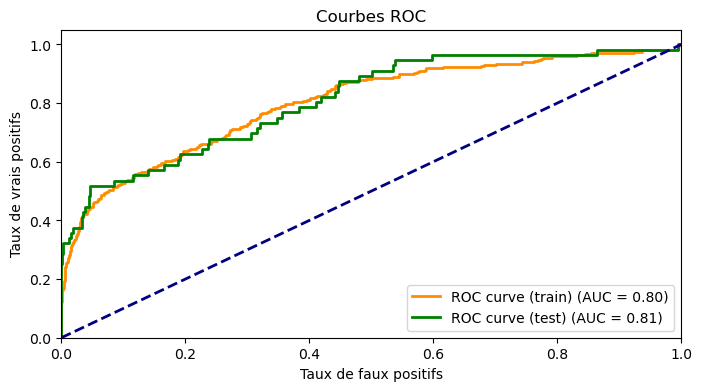

In [219]:
from sklearn.metrics import roc_curve, auc
# Obtenir les prédictions du modèle sur l'ensemble d'entraînement et de test
y_train_pred = result.predict(X_train)
y_test_pred = result.predict(X_test)

# Calculer les courbes ROC et les aires sous la courbe (AUC)
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_pred)
roc_auc_train = auc(fpr_train, tpr_train)

fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_pred)
roc_auc_test = auc(fpr_test, tpr_test)

# Tracer les courbes ROC
plt.figure(figsize=(8, 4))
plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, label='ROC curve (train) (AUC = %0.2f)' % roc_auc_train)
plt.plot(fpr_test, tpr_test, color='green', lw=2, label='ROC curve (test) (AUC = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbes ROC')
plt.legend(loc="lower right")
plt.show()

In [220]:
from sklearn.metrics import classification_report

# Prédire les classes sur la base de test
y_pred = result.predict(X_test) > 0.5

# Générer le rapport de classification
report = classification_report(y_test, y_pred)

# Afficher le rapport de classification
print(report)

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       617
           1       1.00      0.25      0.40        56

    accuracy                           0.94       673
   macro avg       0.97      0.62      0.68       673
weighted avg       0.94      0.94      0.92       673



In [221]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[617   0]
 [ 42  14]]


In [222]:
from sklearn.metrics import classification_report

# Prédire les classes sur la base de test
y_pred = result.predict(X_train) > 0.5

# Générer le rapport de classification
report = classification_report(y_train, y_pred)

# Afficher le rapport de classification
print(report)

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      2447
           1       0.80      0.23      0.36       244

    accuracy                           0.93      2691
   macro avg       0.87      0.61      0.66      2691
weighted avg       0.92      0.93      0.91      2691



In [223]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_train, y_pred)
print(confusion_matrix)

[[2433   14]
 [ 187   57]]
